In [1]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from dataset_preparation import unpack_labels
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
"""train_x, train_y = joblib.load('train_dwt.sav')
dev_x, dev_y = joblib.load('dev_dwt.sav')
eval_x, eval_y = joblib.load('eval_dwt.sav')"""

In [2]:
dev_x = np.load('wpd/without_ar/dev_x.npy', allow_pickle=True)
dev_y = np.load('wpd/without_ar/dev_y.npy', allow_pickle=True)
eval_x = np.load('wpd/without_ar/eval_x.npy', allow_pickle=True)
eval_y = np.load('wpd/without_ar/eval_y.npy', allow_pickle=True)
train_x = np.load('wpd/without_ar/train_x.npy', allow_pickle=True)
train_y = np.load('wpd/without_ar/train_y.npy', allow_pickle=True)

In [3]:
train_y[0]

'bckg'

In [3]:
import class_count
train_classes = class_count.class_count_array(train_y)
print(train_classes)

TypeError: unhashable type: 'numpy.ndarray'

In [4]:
train_x[train_x.isna().any(axis=1)]

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [36]:
train_y = unpack_labels(train_y)
dev_y = unpack_labels(dev_y)
eval_y = unpack_labels(eval_y)

In [3]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
    ('scaler', MinMaxScaler()),
])
train_x = pipeline.fit_transform(train_x)
dev_x = pipeline.transform(dev_x)
eval_x = pipeline.transform(eval_x)

In [ ]:
sm = SMOTE(random_state=42)
#sm_train_x, sm_train_y = sm.fit_resample(train_x, train_y)
train_x, train_y = sm.fit_resample(train_x, train_y)

In [4]:
param_grid = {
    'n_estimators': [200, 300, 400, 500], 'class_weight': ['balanced'],
    'max_features': ['sqrt', 'log2'], 'random_state': [42]
}

In [5]:
forest_model = RandomForestClassifier()
grid_search_md = GridSearchCV(forest_model, param_grid, cv=5, scoring='accuracy')
#grid_search_md.fit(sm_train_x, sm_train_y)
grid_search_md.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [42]},
             scoring='accuracy')

In [6]:
final_model = grid_search_md.best_estimator_
print(grid_search_md.best_params_)

{'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 500, 'random_state': 42}


In [7]:
pred = final_model.predict(dev_x)
report = classification_report(dev_y, pred, digits=4, zero_division=0)

In [8]:
print(report)

              precision    recall  f1-score   support

        absz     0.3333    0.1190    0.1754        42
        bckg     0.8396    1.0000    0.9128     66943
        cpsz     0.0000    0.0000    0.0000        17
        fnsz     0.0000    0.0000    0.0000      3938
        gnsz     0.0000    0.0000    0.0000      8276
        tcsz     0.0000    0.0000    0.0000       505
        tnsz     0.0000    0.0000    0.0000        35

    accuracy                         0.8394     79756
   macro avg     0.1676    0.1599    0.1555     79756
weighted avg     0.7049    0.8394    0.7662     79756



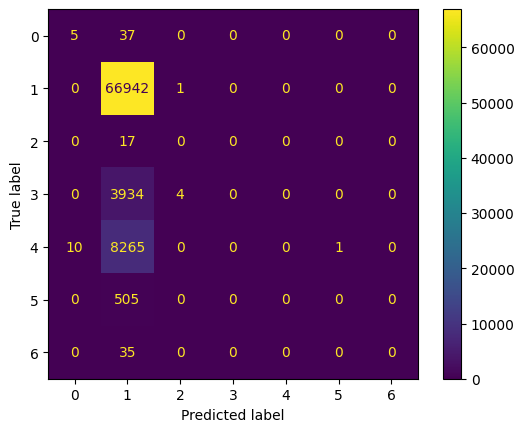

In [9]:
cm = confusion_matrix(dev_y, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [6]:
no_opt_model = RandomForestClassifier(n_estimators=400, random_state=42, class_weight='balanced', max_features='log2')
no_opt_model.fit(train_x, train_y)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=400, random_state=42)

In [7]:
pred = no_opt_model.predict(dev_x)
report = classification_report(dev_y, pred, digits=4, zero_division=0)
print(report)

              precision    recall  f1-score   support

        absz     0.3571    0.1190    0.1786        42
        bckg     0.8396    1.0000    0.9128     66943
        cpsz     0.0000    0.0000    0.0000        17
        fnsz     0.0000    0.0000    0.0000      3938
        gnsz     0.0000    0.0000    0.0000      8276
        tcsz     0.0000    0.0000    0.0000       505
        tnsz     0.0000    0.0000    0.0000        35

    accuracy                         0.8394     79756
   macro avg     0.1710    0.1599    0.1559     79756
weighted avg     0.7049    0.8394    0.7662     79756

